<h1> Zadanie 1 </h1>

In [32]:
from skimage.filters import threshold_minimum,try_all_threshold,threshold_yen
from skimage.morphology import disk
from skimage import io,measure
import skimage as ski
import matplotlib.pyplot as plt
import cv2
from skimage.filters import gaussian
from skimage.morphology import remove_small_objects
from skimage.color import label2rgb


<h2> Polecenie 1 </h2>

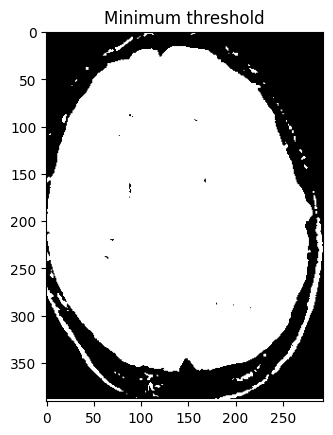

In [33]:
brain = io.imread('brain_tumor.png')
brain = cv2.cvtColor(brain, cv2.COLOR_BGR2GRAY)

im_tresh = threshold_minimum(brain)
im_binary = brain > im_tresh

plt.title('Minimum threshold')
plt.imshow(im_binary,cmap='gray')


<h2> Polecenie 2 </h2>

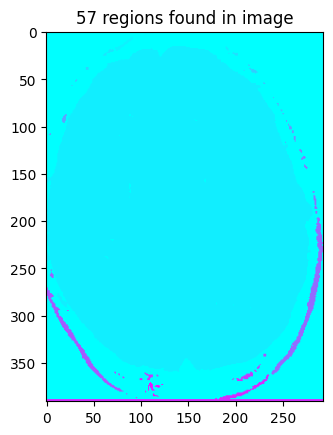

In [34]:
brain_i , num_region = ski.measure.label(im_binary,return_num=True)
plt.title(f'{num_region} regions found in image')
plt.imshow(brain_i,cmap='cool')

<h1> Polecenie 3 </h1>

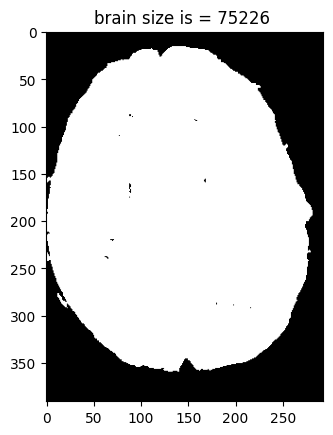

In [35]:
reg_prop = ski.measure.regionprops(brain_i)
max_area = 0
max_reg = None

for region in reg_prop:
    if region.area > max_area:
        max_area = region.area
        max_reg = region
    
max_reg_mask = brain_i == max_reg.label  

plt.figure()
plt.title(f'brain size is = {int(max_area)} ')
plt.imshow(max_reg_mask, cmap='gray')


<h2> Polecenie 4 </h2>

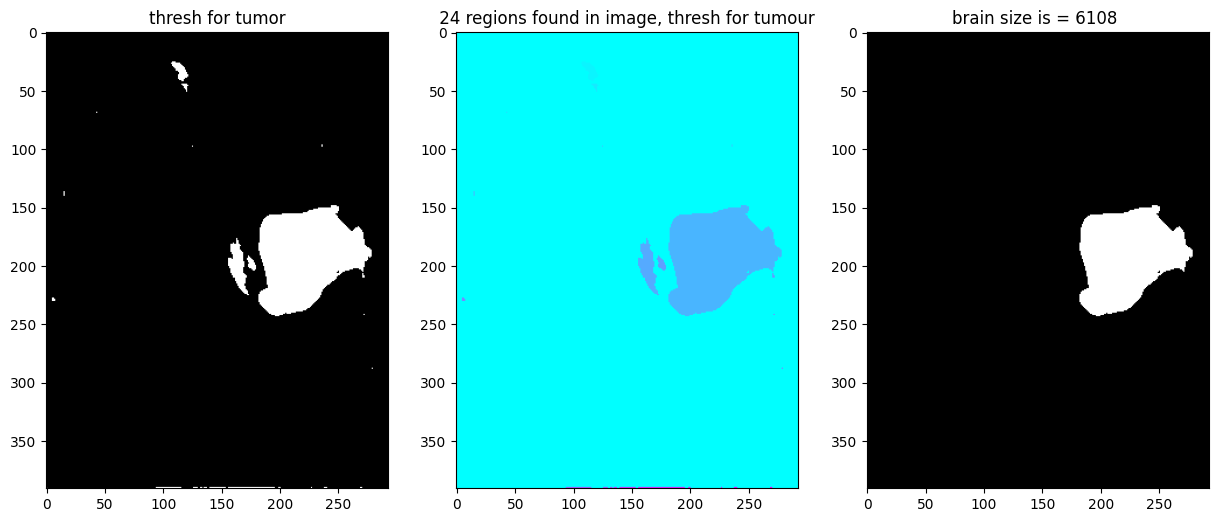

In [36]:
brain_t = io.imread('brain_tumor.png')
brain_t = cv2.cvtColor(brain_t, cv2.COLOR_BGR2GRAY)

brain_tresh = threshold_yen(brain_t)

brain_binary = brain_t > brain_tresh * 1.4

plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.title('thresh for tumor')
plt.imshow(brain_binary,cmap='gray')

plt.subplot(1,3,2)

labeled_image, num_segments = ski.measure.label(brain_binary, return_num=True)
reg_prop = ski.measure.regionprops(labeled_image)

plt.title(f' {num_segments} regions found in image, thresh for tumour ')
plt.imshow(labeled_image,cmap='cool')

max_area2 = 0
max_reg = None

for region in reg_prop:
    if region.area > max_area2:
        max_area2 = region.area
        max_reg = region
    
max_reg_mask2 = labeled_image == max_reg.label  

plt.subplot(1,3,3)
plt.title(f'brain size is = {int(max_area2)} ')
plt.imshow(max_reg_mask2, cmap='gray')




<h2> Polecenie 5 </h2>

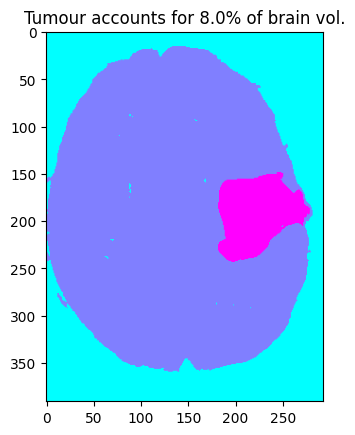

In [37]:
plt.figure()
combined_mask = max_reg_mask.astype(int) + max_reg_mask2.astype(int)
plt.title(f'Tumour accounts for {max_area2 * 100 // max_area}% of brain vol.')
plt.imshow(combined_mask,cmap='cool')

<h1> Zadanie 2 </h1>

<h2> Polecenie 1 </h2>

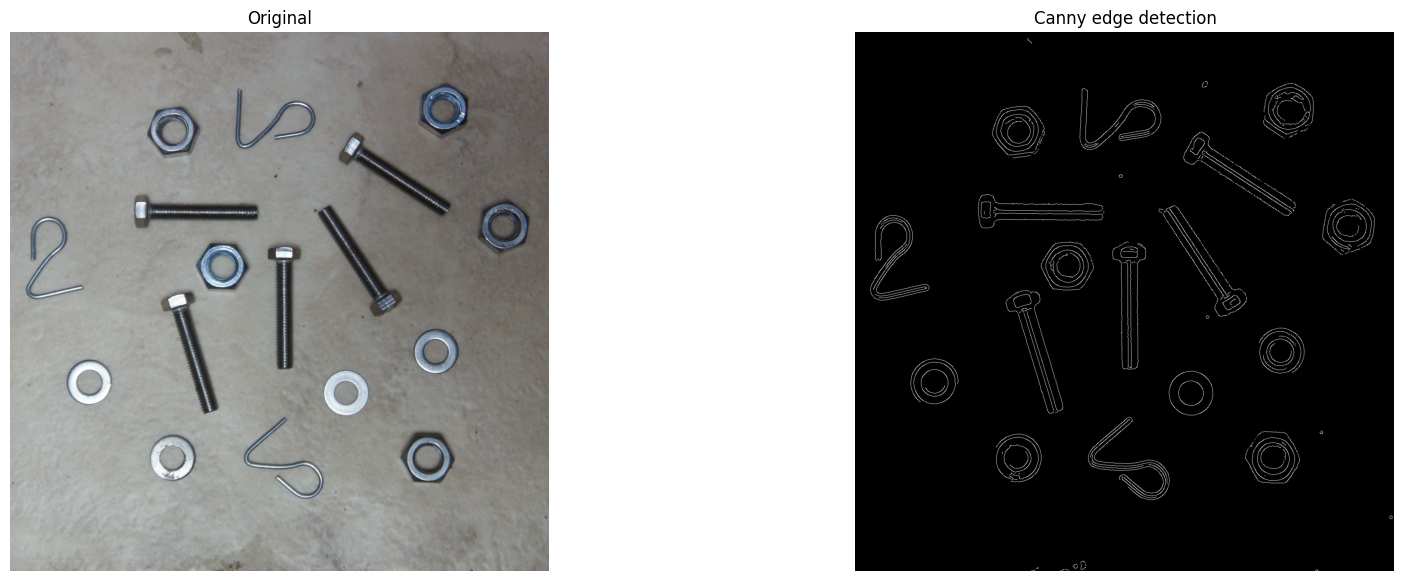

In [38]:
img = io.imread('bolts.jpg')
resize = cv2.resize(img,(int(img.shape[1] * 0.5) , int(img.shape[0] * 0.5)))

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Original')
plt.axis('off')
plt.imshow(resize)

img_gray = cv2.cvtColor(resize,cv2.COLOR_BGR2GRAY)

img_gauss = gaussian(img_gray,sigma= 3)
img_gauss_uint8 = (img_gauss * 255).astype('uint8')
low = 20 
high = 40

edges = cv2.Canny(img_gauss_uint8, low, high)
plt.subplot(1,2,2)
plt.title('Canny edge detection')
plt.axis('off')
plt.imshow(edges,cmap='gray')


<h2> Polecenie 2 </h2>

(np.float64(-0.5), np.float64(1387.5), np.float64(1387.5), np.float64(-0.5))

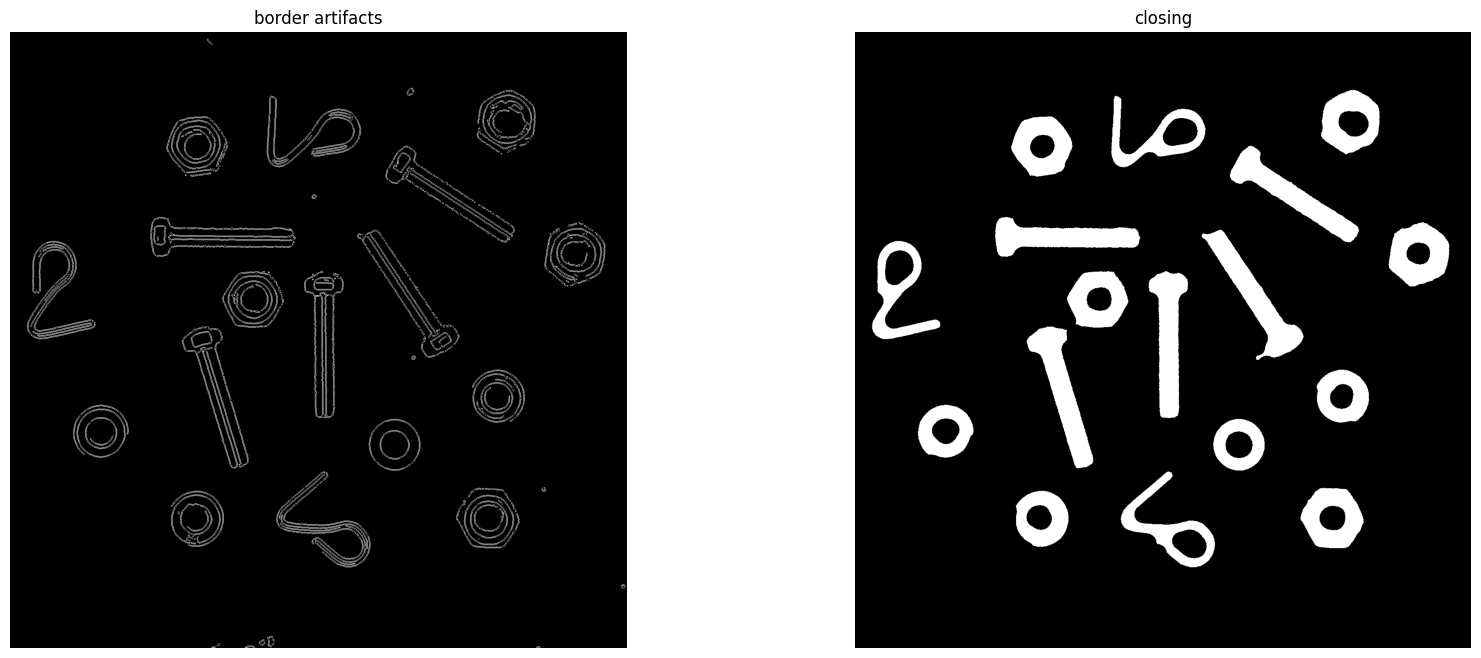

In [39]:
low = 30
high = 50

edges2 = cv2.Canny(edges, low, high)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('border artifacts')
plt.imshow(edges2,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)

edge_close = ski.morphology.closing(edges2,disk(20))

edges_binary = edge_close > 0
edges_cleaned = remove_small_objects(edges_binary, min_size=1200) 
plt.title('closing')
plt.imshow(edges_cleaned,cmap='gray')
plt.axis('off')

<h2> Polecenie 3 </h2>

(np.float64(-0.5), np.float64(1387.5), np.float64(1387.5), np.float64(-0.5))

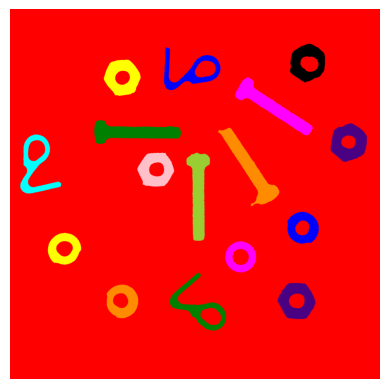

In [40]:
label = ski.measure.label(edges_cleaned)
colored_image = label2rgb(label, bg_label=1, kind='overlay')
plt.imshow(colored_image)
plt.axis('off')

<h1> Zadanie 3 </h1>

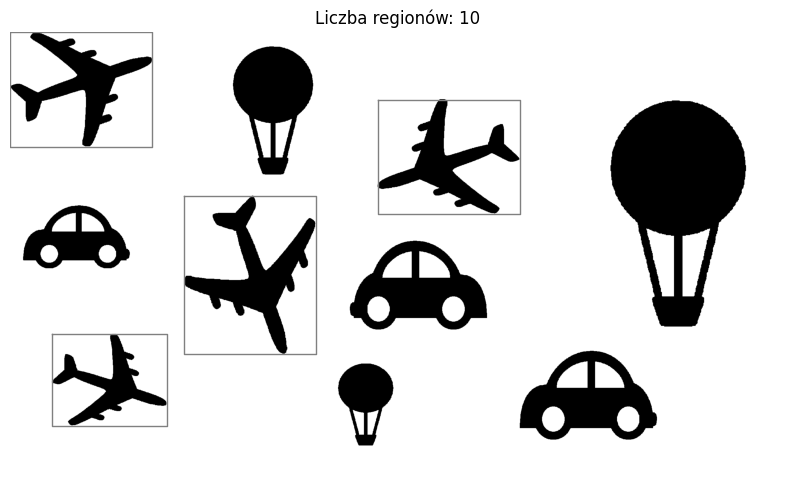

In [41]:

img = io.imread('planes.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

binary_image = (img < 128).astype(int)

labeled_image, num = measure.label(binary_image, return_num=True)

region_img = measure.regionprops(labeled_image)

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.title(f"Liczba regionów: {num}")

for props in region_img:
    if props.euler_number == 1:
        minr, minc, maxr, maxc = props.bbox
        plt.plot(
            [minc, maxc, maxc, minc, minc],
            [minr, minr, maxr, maxr, minr],
            color="gray",
            linewidth=1
        )
plt.axis('off')
plt.show()
